In [1]:
# import libraries
import pandas as pd
import numpy as np

In [2]:
cars_df = pd.read_csv('Cars.csv')
cars_df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Exploratory data analysis:
## 1. Measures of central tendency
## 2. Measures of dispersion
## 3. Third moment business decision
## 4. Fourth moment business decision
## 5. Probability distributions of variables 
## 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

In [4]:
cars_df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [19]:
cars_df.shape

(81, 5)

<BarContainer object of 81 artists>

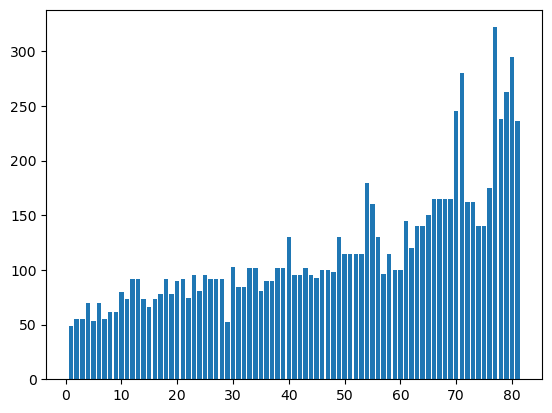

In [6]:
# Graphical Representation
import matplotlib.pyplot as plt

#HP
plt.bar(height=cars_df.HP, x = np.arange(1,82,1)) # barplot

(array([15., 35.,  9.,  6.,  9.,  0.,  2.,  2.,  1.,  2.]),
 array([ 49. ,  76.3, 103.6, 130.9, 158.2, 185.5, 212.8, 240.1, 267.4,
        294.7, 322. ]),
 <BarContainer object of 10 artists>)

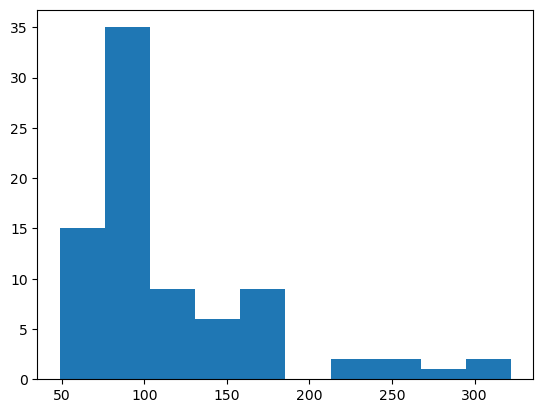

In [7]:
plt.hist(cars_df.HP) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x180b2669d90>,
 'caps': [<matplotlib.lines.Line2D at 0x180b2678370>,
 'boxes': [<matplotlib.lines.Line2D at 0x180b2669a90>],
 'medians': [<matplotlib.lines.Line2D at 0x180b2678910>],
 'fliers': [<matplotlib.lines.Line2D at 0x180b2678be0>],
 'means': []}

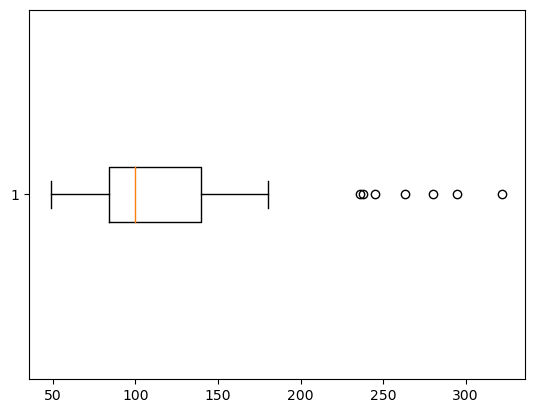

In [13]:
# making the boxplot horizontal helps one visualize the distribution better
plt.boxplot(cars_df.HP, vert=False) #boxplot

<BarContainer object of 81 artists>

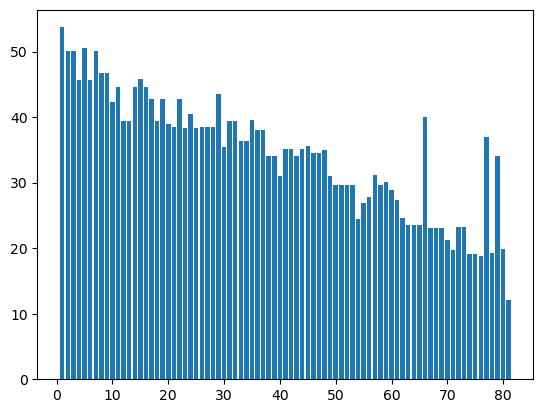

In [9]:
plt.bar(height=cars_df.MPG, x= np.arange(1,82,1)) #barplot

(array([ 1.,  6., 10.,  4., 10., 15., 17.,  8.,  5.,  5.]),
 array([12.10126289, 16.26120474, 20.42114659, 24.58108844, 28.74103029,
        32.90097213, 37.06091398, 41.22085583, 45.38079768, 49.54073953,
        53.70068138]),
 <BarContainer object of 10 artists>)

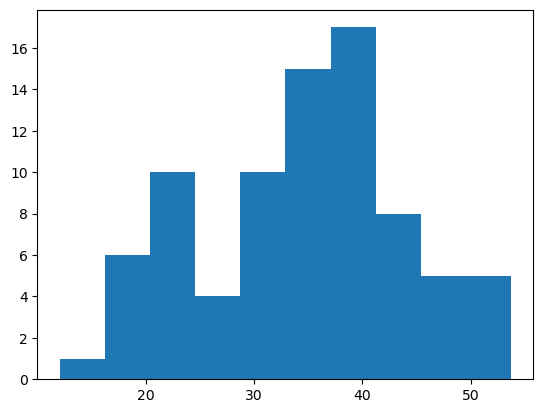

In [10]:
plt.hist(cars_df.MPG) #histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x180b2768e80>,
 'caps': [<matplotlib.lines.Line2D at 0x180b277a460>,
 'boxes': [<matplotlib.lines.Line2D at 0x180b2768bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x180b277aa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x180b277acd0>],
 'means': []}

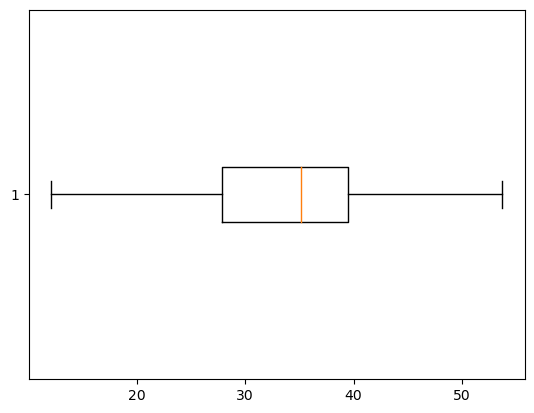

In [15]:
# making the boxplot horizontal helps one visualize the distribution better
plt.boxplot(cars_df.MPG, vert=False) #boxplot

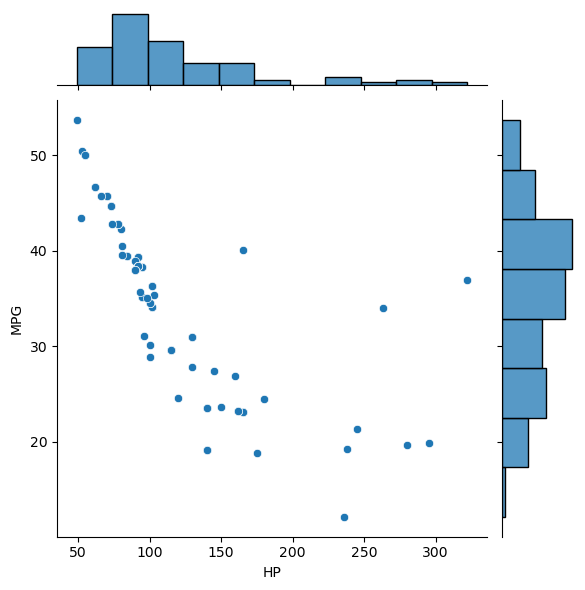

In [17]:
# Jointplot
# we can see a scatterplot of 2 variables WRT to each other and also see their distributions on their respective axes. 
import seaborn as sns
sns.jointplot(x=cars_df.HP, y=cars_df.MPG)

C:\Users\willn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP', ylabel='count'>

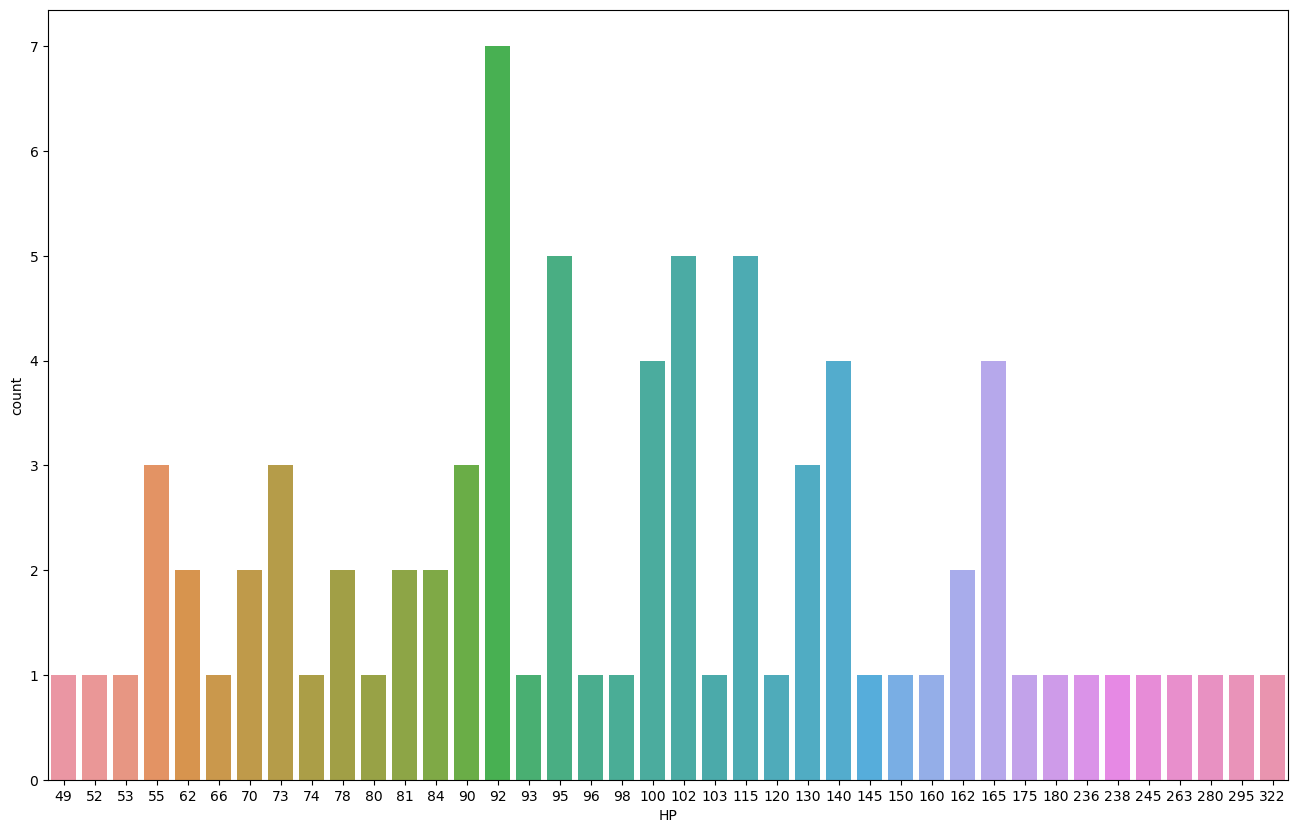

In [18]:
# Countplot - This is essentially a graphical representation of value_counts()
plt.figure(1, figsize=(16,10))
sns.countplot(cars_df.HP)

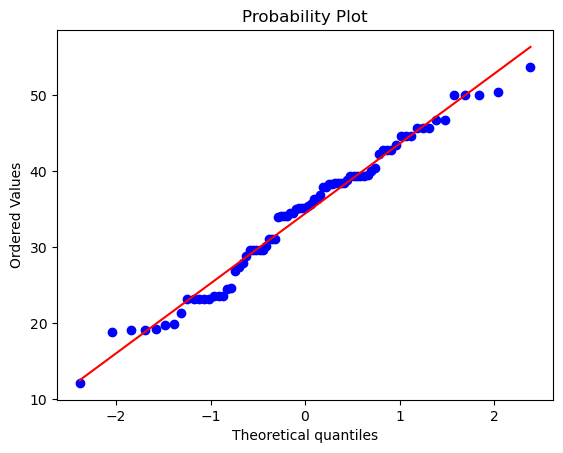

In [20]:
#Q-Q Plot
from scipy import stats
import matplotlib.pyplot as plt
import pylab
stats.probplot(cars_df.MPG, dist = 'norm', plot=pylab)
plt.show()

In [21]:
help(stats.probplot)

Help on function probplot in module scipy.stats._morestats:

probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)
    Calculate quantiles for a probability plot, and optionally show the plot.
    
    Generates a probability plot of sample data against the quantiles of a
    specified theoretical distribution (the normal distribution by default).
    `probplot` optionally calculates a best-fit line for the data and plots the
    results using Matplotlib or a given plot function.
    
    Parameters
    ----------
    x : array_like
        Sample/response data from which `probplot` creates the plot.
    sparams : tuple, optional
        Distribution-specific shape parameters (shape parameters plus location
        and scale).
    dist : str or stats.distributions instance, optional
        Distribution or distribution function name. The default is 'norm' for a
        normal probability plot.  Objects that look enough like a
        stats.distributions instance (i.e.

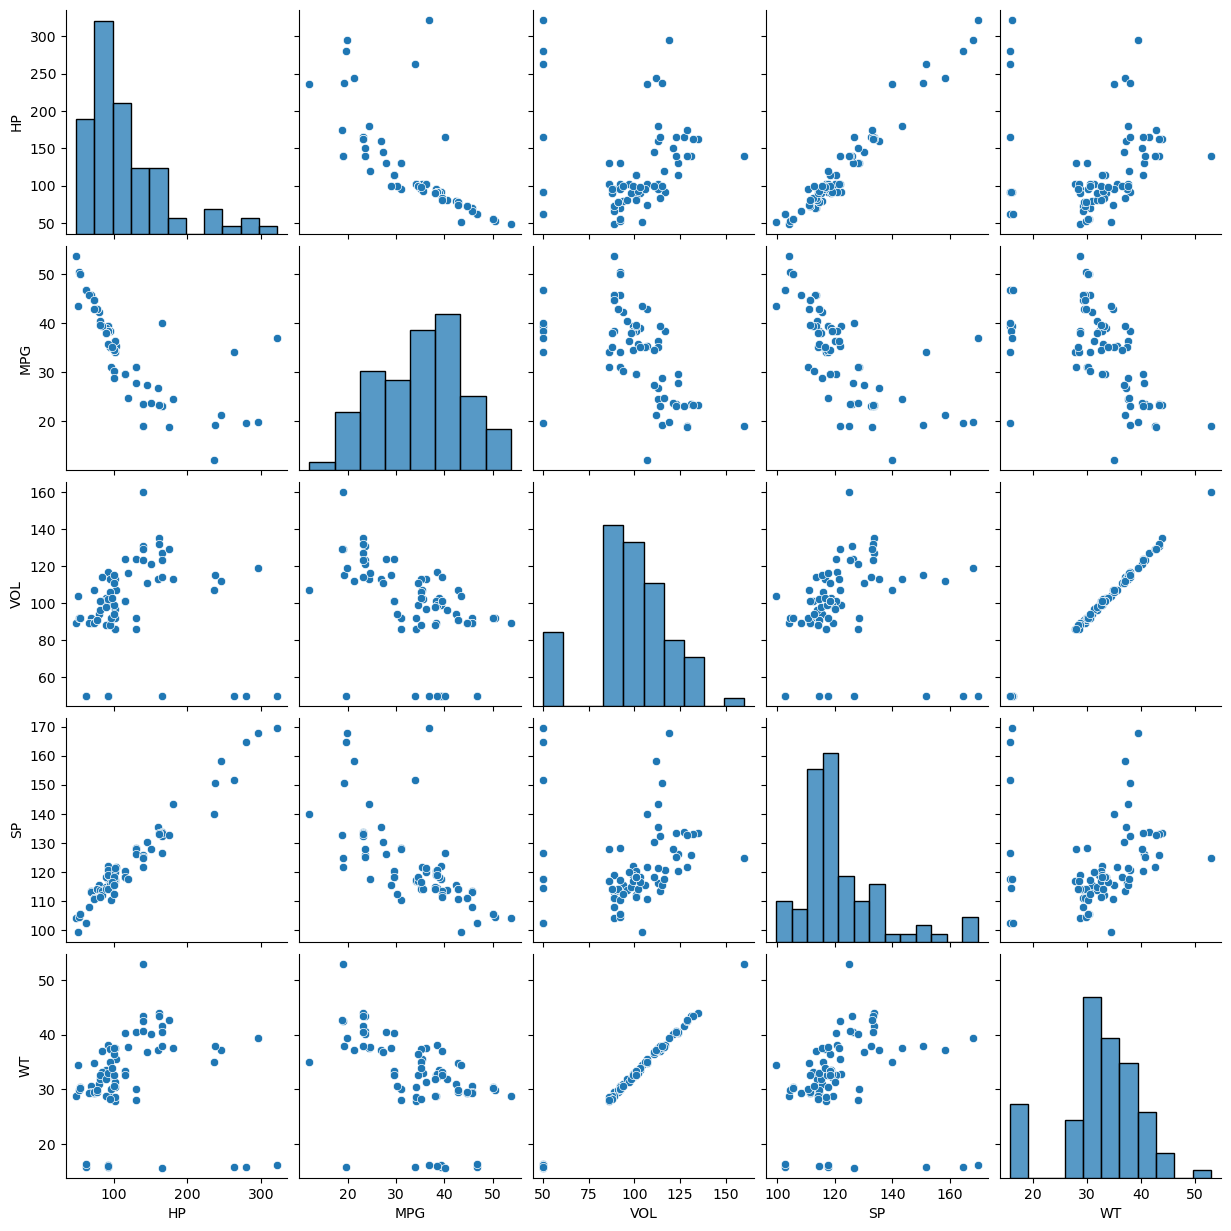

In [22]:
# scatter plot of variables WRT to every other variable including themselves so we get a histogram of the columns
# distribution on the diagonal of the output graphs
sns.pairplot(cars_df)

In [24]:
# Correlation matrix
cars_df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


### We can see there exists high collinearity between input variables, most noteably between HP & SP, and VOL & WT - Thus we have a collinearity problem

In [25]:
# Prepare a model considering all variables
import statsmodels.formula.api as smf # for regression model

ml1 = smf.ols('MPG ~ WT + VOL + SP + HP', data=cars_df).fit() #<----Regression Model

#Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           1.54e-23
Time:                        09:52:40   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

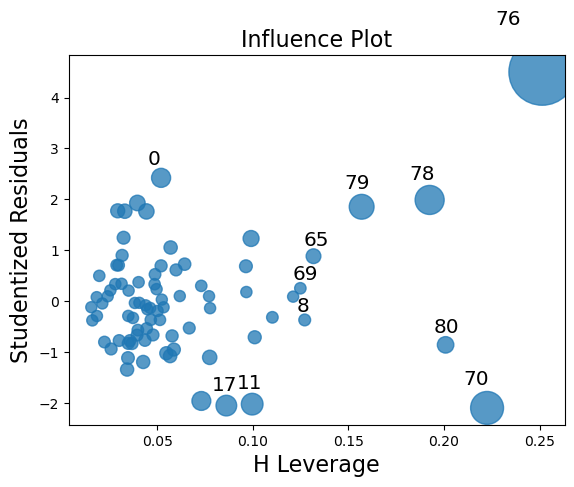

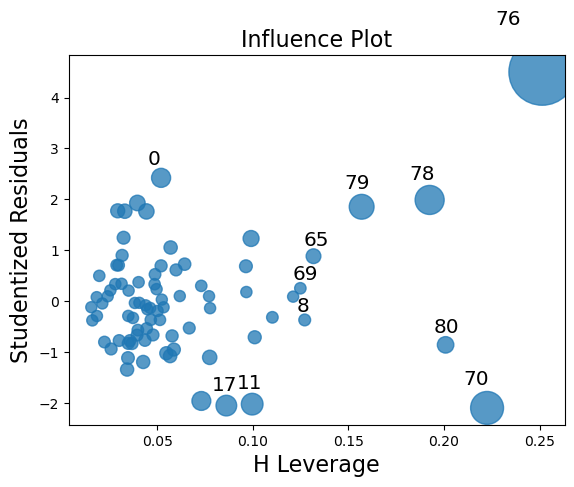

In [26]:
# Checking whether data has any influential values
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)

# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

In [28]:
new_cars_df = cars_df.drop(cars_df.index[[76]])

In [30]:
# Preparing model                  
ml_new = smf.ols('MPG ~ WT + VOL + HP + SP', data = new_cars_df).fit()    

# Summary
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     84.96
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           4.42e-27
Time:                        09:58:12   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             454.0
Df Residuals:                      75   BIC:                             465.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8268     13.323      2.089      0.040       1.287      54.367
WT             0.0375      1.515      0.025      0.980      -2.980       3.055
VOL           -0.1855      0.509     -0.364      0.717      -1.199       0.828
HP            -0.2266      0.035     -6.413      0.000      -0.297      -0.156
SP             0.4119      0.141      2.913      0.005       0.130       0.694
==============================================================================
Omnibus:                        9.877   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.708
Skew:                           0.768   Prob(JB):                      0.00780
Kurtosis:                       3.744   Cond. No.                     5.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Check for colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = Colinearity
# calculating VIF's values of independent variable

rsq_hp = smf.ols('HP ~ WT + VOL + SP', data=new_cars_df).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT ~ HP + VOL + SP', data = new_cars_df).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('VOL ~ WT + SP + HP', data = new_cars_df).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('SP ~ WT + VOL + HP', data = new_cars_df).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

print('vif_hp',vif_hp,'vif_wt',vif_wt,'vif_vol',vif_vol,'vif_sp',vif_sp)

vif_hp 16.993671286297243 vif_wt 603.0328166852634 vif_vol 602.7506393674782 vif_sp 17.110783389089956


In [33]:
# Storing VIF values in DF
df1 = {'Variables':['HP', 'WT', 'VOL', 'SP'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
vif_df = pd.DataFrame(df1)
vif_df

,Variables,VIF
0,HP,16.993671
1,WT,603.032817
2,VOL,602.750639
3,SP,17.110783


## WE can see WT has the hightest VIF value, thus we will drop from prediction model

In [34]:
# Final model
final_ml = smf.ols('MPG ~ VOL + SP + HP', data=new_cars_df).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     114.8
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           3.78e-28
Time:                        10:05:26   Log-Likelihood:                -222.00
No. Observations:                  80   AIC:                             452.0
Df Residuals:                      76   BIC:                             461.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.7555     12.922      2.148      0.035       2.018      53.493
VOL           -0.1729      0.021     -8.178      0.000      -0.215      -0.131
SP             0.4124      0.139      2.963      0.004       0.135       0.690
HP            -0.2268      0.035     -6.525      0.000      -0.296      -0.158
==============================================================================
Omnibus:                        9.859   Durbin-Watson:                   1.125
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.686
Skew:                           0.767   Prob(JB):                      0.00788
Kurtosis:                       3.742   Cond. No.                     5.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Prediction
pred = final_ml.predict(new_cars_df)

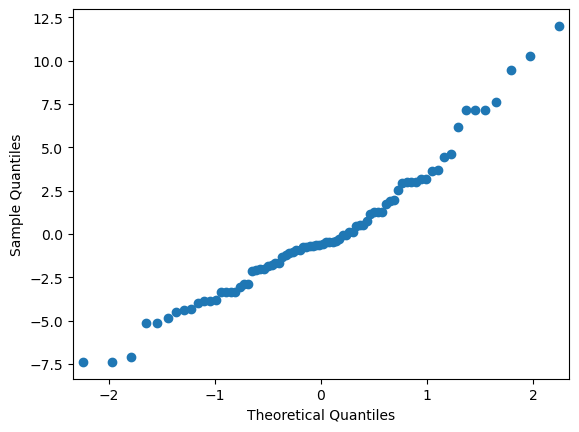

In [36]:
# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

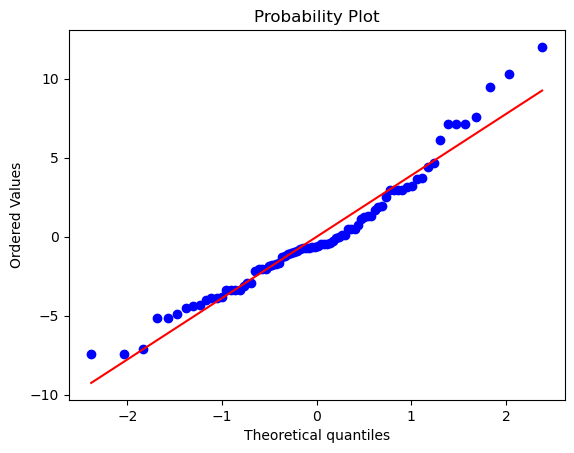

In [37]:
# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

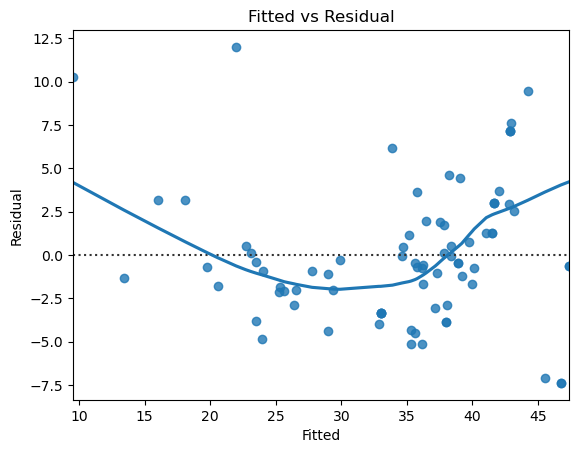

In [39]:
# Residuals vs. Fitted Plot
sns.residplot(x=pred, y =new_cars_df.MPG, lowess=True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

In [40]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split

cars_train, cars_test = train_test_split(new_cars_df, test_size=0.2) # <-- 20% will be test data

In [42]:
# preparing model on training data
model_train = smf.ols('MPG ~ HP + SP + VOL', data=cars_train).fit()

In [43]:
# prediction on test data
test_pred = model_train.predict(cars_test)

In [44]:
# test residual values
test_resid = cars_test.MPG-test_pred
#RMSE value for test data
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse

2.8157209953299747

In [45]:
100 - 2.8157209953299747

97.18427900467003

In [46]:
train_pred = model_train.predict(cars_train)

In [47]:
train_resid = train_pred - cars_train.MPG
#RMSE value for train data
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

4.131793673103655

In [48]:
100 - 4.131793673103655

95.86820632689634